In [2]:

import vcf
import gzip
import subprocess
import pandas as pd
#from jupyterthemes  import jtplot

#jtplot.style(theme="onedork")

from matplotlib import pyplot as plt




In [2]:

vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123.vcf.gz',compressed=True,encoding='UTF-8')


gene_id_presence=[]
gene_id_name=[]
for record in vcf_reader:
    pres=set(record.INFO.keys()).intersection(set(['GENEINFO']))
    gene_id_presence.append(pres)
    if pres!= set():
        gene_id_name.append(pres)
    else:
        gene_id_name.append(" ")


    

Calculo a cuantos tendria que mapear por coordenadas 

In [3]:
gene_id_presence.count(set())

137

In [4]:
gene_id_presence.index(set())

14622

In [5]:
cnt=0

vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123.vcf.gz',compressed=True,encoding='UTF-8')

for variant in vcf_reader:
    cnt=cnt+1
    if(cnt==14622):
        esta=variant
        break
        
        


str(esta.CHROM)+"-"+str(esta.POS)+"-"+str(esta.REF)+"-"+str(esta.ALT)



'1-104094352-C-[T]'

In [6]:
esta.ID

'587368'

In [7]:
esta.INFO

{'ALLELEID': 578325,
 'CLNDISDB': ['MedGen:CN257749', 'OMIM:618160'],
 'CLNDN': ['ISOLATED_GROWTH_HORMONE_DEFICIENCY', '_TYPE_V'],
 'CLNHGVS': ['NC_000001.10:g.104094352C>T'],
 'CLNREVSTAT': ['no_assertion_criteria_provided'],
 'CLNSIG': ['Pathogenic'],
 'CLNVC': 'single_nucleotide_variant',
 'CLNVCSO': 'SO:0001483',
 'CLNVI': ['OMIM_Allelic_Variant:618016.0002'],
 'GENEINFO': 'RNPC3:55599',
 'MC': ['SO:0001587|nonsense'],
 'ORIGIN': ['1']}

In [8]:
import gzip
with  gzip.open('/home/felipe/dbNSFP4.0b2a.txt.gz','rt') as f:
     for line in f:
            a=line
            break

In [9]:
a.split("\t")


['#chr',
 'pos(1-based)',
 'ref',
 'alt',
 'aaref',
 'aaalt',
 'rs_dbSNP151',
 'hg19_chr',
 'hg19_pos(1-based)',
 'hg18_chr',
 'hg18_pos(1-based)',
 'aapos',
 'genename',
 'Ensembl_geneid',
 'Ensembl_transcriptid',
 'Ensembl_proteinid',
 'Uniprot_acc',
 'Uniprot_entry',
 'APPRIS',
 'GENCODE_basic',
 'TSL',
 'VEP_canonical',
 'cds_strand',
 'refcodon',
 'codonpos',
 'codon_degeneracy',
 'Ancestral_allele',
 'AltaiNeandertal',
 'Denisova',
 'VindijiaNeandertal',
 'SIFT_score',
 'SIFT_converted_rankscore',
 'SIFT_pred',
 'SIFT4G_score',
 'SIFT4G_converted_rankscore',
 'SIFT4G_pred',
 'Polyphen2_HDIV_score',
 'Polyphen2_HDIV_rankscore',
 'Polyphen2_HDIV_pred',
 'Polyphen2_HVAR_score',
 'Polyphen2_HVAR_rankscore',
 'Polyphen2_HVAR_pred',
 'LRT_score',
 'LRT_converted_rankscore',
 'LRT_pred',
 'LRT_Omega',
 'MutationTaster_score',
 'MutationTaster_converted_rankscore',
 'MutationTaster_pred',
 'MutationTaster_model',
 'MutationTaster_AAE',
 'MutationAssessor_score',
 'MutationAssessor_ranksc

In [10]:

vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123 _cf_GRCh38.vcf.gz',compressed=True,encoding='UTF-8')


patcnt=0
for record in vcf_reader:
    if 'CLNSIG' in record.INFO.keys():
        if record.INFO['CLNSIG']==['Pathogenic']:
            taver=record
            break
            
 


In [11]:
taver.INFO


{'ALLELEID': 181485,
 'CLNDISDB': ['MedGen:C4015293', 'OMIM:616126', 'Orphanet:ORPHA319563'],
 'CLNDN': ['Immunodeficiency_38_with_basal_ganglia_calcification'],
 'CLNHGVS': ['NC_000001.11:g.1014143C>T'],
 'CLNREVSTAT': ['no_assertion_criteria_provided'],
 'CLNSIG': ['Pathogenic'],
 'CLNVC': 'single_nucleotide_variant',
 'CLNVCSO': 'SO:0001483',
 'CLNVI': ['OMIM_Allelic_Variant:147571.0003'],
 'GENEINFO': 'ISG15:9636',
 'MC': ['SO:0001587|nonsense'],
 'ORIGIN': ['1'],
 'RS': ['786201005']}

In [12]:
import re
vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123 _cf_GRCh38.vcf.gz',compressed=True,encoding='UTF-8')

clndb_id=[]
clndb= []
clnpath=[]
for record in vcf_reader:
    s="0"
    if 'CLNSIG' in record.INFO.keys():
        item=record.INFO['CLNSIG'][0]
        if item==None:
            continue
        s=item
    clnpath.append(s)
    clndb_id.append(int(record.ID))
    
    
    
 


df_cln_info_pat=pd.DataFrame({"clinvar_id":clndb_id,"patho_status":clnpath})

In [13]:
df_cln_info_pat.loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]

,clinvar_id,patho_status
2,183381,Pathogenic
8,161455,Pathogenic
9,161454,Pathogenic
20,210112,Conflicting_interpretations_of_pathogenicity
24,243036,Pathogenic
26,243037,Pathogenic
31,210111,Conflicting_interpretations_of_pathogenicity
38,430121,Conflicting_interpretations_of_pathogenicity
46,574478,Pathogenic
49,126556,Pathogenic


In [14]:
df_cln_info_pat["patho_status"].unique()

array(['Benign', 'Uncertain_significance', 'Pathogenic', 'Likely_benign',
       'Benign/Likely_benign',
       'Conflicting_interpretations_of_pathogenicity',
       'Likely_pathogenic', 'not_provided',
       'Pathogenic/Likely_pathogenic', 'risk_factor', '0', 'association',
       'drug_response', 'Affects', 'other', 'protective'], dtype=object)

para cada variante en clinvar busco si aparece en omim y el id correspondiente

In [50]:
import re
vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123 _cf_GRCh38.vcf.gz',compressed=True,encoding='UTF-8')

clndb_id=[]
clndb= []
clnpath=[]
for record in vcf_reader:
    s="0"
    if 'CLNDISDB' in record.INFO.keys():
         for item in record.INFO['CLNDISDB']:
                if item==None:
                    continue
                if len(re.findall(r"OMIM:",item)):
                    s=re.search(r"OMIM:(\d+)",item).group(1)
    clndb.append(int(s))
    clndb_id.append(int(record.ID))
    
    
    
 


In [97]:
df_cln_db=pd.DataFrame({"clinvar_id":clndb_id,"Mim Number":clndb})

In [98]:
df_omim=pd.read_csv("~/OMIM_genemap2.txt",sep="\t",engine='python',skiprows=3)

In [99]:
df_omim=df_omim.loc[df_omim["Mim Number"].notna()]

In [100]:
df_omim["Mim Number"]=df_omim["Mim Number"].astype(pd.Int64Dtype(),errors="ignore",inplace=True)

In [101]:
df_omim.columns

Index(['# Chromosome', 'Genomic Position Start', 'Genomic Position End',
       'Cyto Location', 'Computed Cyto Location', 'Mim Number', 'Gene Symbols',
       'Gene Name', 'Approved Symbol', 'Entrez Gene ID', 'Ensembl Gene ID',
       'Comments', 'Phenotypes', 'Mouse Gene Symbol/ID'],
      dtype='object')

In [105]:

df_omimold=pd.read_csv("/home/felipe/omim-master/data/full_omim_table.txt",sep="\t")




In [108]:
df_omimold.head()

,genes,hgnc_synonyms,hgnc_genes,phenotype,phenotypeInheritance,geneMimNumber,phenotypeMimNumber,chromosome,comments
0,AD7CNTP,NaN,NaN,NaN,NaN,607413,NaN,1,NaN
1,ALPQTL2,NaN,NaN,"Alkaline phosphatase, plasma level of, QTL 2",None,612367,612367.0,1,linkage with rs1780324
2,ANON1,NaN,NaN,"Anorexia nervosa, susceptibility to, 1",None,606788,606788.0,1,NaN
3,BCC1,NaN,NaN,"Basal cell carcinoma, susceptibility to, 1",None,605462,605462.0,1,associated with rs7538876
4,BMND3,NaN,NaN,Bone mineral density QTL 3,None,606928,606928.0,1,?another locus at 3p21


In [110]:
df_omimold.phenotypeInheritance.isna().sum()

11086

In [111]:
len(df_omimold)

18271

In [114]:
sum(df_omimold["phenotypeInheritance"].loc[~df_omimold.phenotypeInheritance.isna()]=="Autosomal dominant")

2200

In [115]:
sum(df_omimold["phenotypeInheritance"].loc[~df_omimold.phenotypeInheritance.isna()]=="Autosomal recessive")

2336

In [116]:
import re
vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123 _cf_GRCh38.vcf.gz',compressed=True,encoding='UTF-8')
for record in vcf_reader:
    break


In [118]:
record.

{'AF_ESP': 0.00546,
 'AF_EXAC': 0.00165,
 'AF_TGP': 0.00619,
 'ALLELEID': 446939,
 'CLNDISDB': ['MedGen:C4015293', 'OMIM:616126', 'Orphanet:ORPHA319563'],
 'CLNDN': ['Immunodeficiency_38_with_basal_ganglia_calcification'],
 'CLNHGVS': ['NC_000001.11:g.1014042G>A'],
 'CLNREVSTAT': ['criteria_provided', '_single_submitter'],
 'CLNSIG': ['Benign'],
 'CLNVC': 'single_nucleotide_variant',
 'CLNVCSO': 'SO:0001483',
 'GENEINFO': 'ISG15:9636',
 'MC': ['SO:0001583|missense_variant'],
 'ORIGIN': ['1'],
 'RS': ['143888043']}

In [40]:

df_omimclin=pd.read_csv("/home/felipe/clinvar/clinvar_omim_result.txt",sep="\t")




In [41]:
df_omimclin.head(30)

,Name,Gene(s),Condition(s),Clinical significance (Last reviewed),Review status,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),Unnamed: 11
0,NM_005211.3(CSF1R):c.1969+115_1969+116del,CSF1R,"BRAIN ABNORMALITIES, NEURODEGENERATION, AND DY...","Pathogenic(Last reviewed: Jun 21, 2019)",no assertion criteria provided,NaN,NaN,NaN,NaN,635123,622958,NaN
1,NM_000492.3(CFTR):c.(3367+1_3368-1)_(3468+1_34...,CFTR,Cystic fibrosis,"Pathogenic(Last reviewed: Aug 31, 2018)",reviewed by expert panel,NaN,NaN,NaN,NaN,634831,622706,NaN
2,LRG_670t1:c.(510+1_511-1)_(663+1_664-1)del,TBX5,Holt-Oram syndrome,"Pathogenic(Last reviewed: Jun 14, 2018)",no assertion criteria provided,NaN,NaN,NaN,NaN,633773,622206,NaN
3,LRG_670t1:c.946C>T,TBX5,Holt-Oram syndrome,"Pathogenic(Last reviewed: Jun 14, 2018)",no assertion criteria provided,NaN,NaN,NaN,NaN,633760,622205,NaN
4,LRG_670t1:c.(362+1_363-1)_(510+1_511-1)del,TBX5,Holt-Oram syndrome,"Pathogenic(Last reviewed: Jun 14, 2018)",no assertion criteria provided,NaN,NaN,NaN,NaN,633758,622204,NaN
5,LRG_670t1:c.(?_-667)_(*1602_?)del,TBX5,Holt-Oram syndrome,"Pathogenic(Last reviewed: Jun 14, 2018)",no assertion criteria provided,NaN,NaN,NaN,NaN,633749,622203,NaN
6,LRG_670t1:c.67_81delins,TBX5,Holt-Oram syndrome,"Pathogenic(Last reviewed: Jun 14, 2018)",no assertion criteria provided,NaN,NaN,NaN,NaN,633748,622202,NaN
7,LRG_670t1:c.1033_1034dup,TBX5,Holt-Oram syndrome,"Pathogenic(Last reviewed: Jun 14, 2018)",no assertion criteria provided,NaN,NaN,NaN,NaN,633746,622201,NaN
8,LRG_670t1:c.(663+1_664-1)_(755+1_756-1)del,TBX5,Holt-Oram syndrome,"Pathogenic(Last reviewed: Jun 14, 2018)",no assertion criteria provided,NaN,NaN,NaN,NaN,633742,622200,NaN
9,LRG_670t1:c.(?_-667)_(755+1_756-1)dup,TBX5,Holt-Oram syndrome,"Pathogenic(Last reviewed: Jun 14, 2018)",no assertion criteria provided,NaN,NaN,NaN,NaN,633740,622199,NaN


In [ ]:
df_omimclin["Comments"]=df_omimclin["Comments"].str.upper()
df_omimclin["Phenotypes"]=df_omimclin["Phenotypes"].str.upper()

df_omimclin["auto_recessive"]=((df_omimclin["Phenotypes"].str.extract(r'(AUTOSOMAL RECESSIVE)')=="AUTOSOMAL RECESSIVE")|(df_omimcin["Comments"].str.extract(r'(AUTOSOMAL RECESSIVE)')=="AUTOSOMAL RECESSIVE")) 


df_omimclin["auto_dominant"]=((df_omimclin["Phenotypes"].str.extract(r'(AUTOSOMAL DOMINANT)')=="AUTOSOMAL DOMINANT")|(df_omimclin["Comments"].str.extract(r'(AUTOSOMAL DOMINANT)')=="AUTOSOMAL DOMINANT")) 

In [42]:
df_omimclin["Last reviewed"]=df_omimclin["Clinical significance (Last reviewed)"].str.extract(r'Last reviewed:(.*)\)')

In [43]:
df_omimclin["Condition(s)"]=df_omimclin["Condition(s)"].str.upper()

In [44]:
df_omimclin["Condition(s)"].str.contains("AUTOSOMAL DOMINANT").sum()

6555

In [45]:
df_omimclin["autosomal_dominant"]=df_omimclin["Condition(s)"].str.contains("AUTOSOMAL DOMINANT")

In [46]:
df_omimclin["Condition(s)"].str.contains("AUTOSOMAL RECESSIVE").sum()

9676

In [47]:
df_omimclin["autosomal_recessive"]=df_omimclin["Condition(s)"].str.contains("AUTOSOMAL RECESSIVE")

In [52]:
df_omimclin["Last reviewed"]=pd.to_datetime(df_omimclin["Last reviewed"])

In [53]:
df_omimclin.to_pickle("df_omim_clin")

In [55]:
df_cln_info_pat=pd.read_csv("df_cln_info_pat",low_memory=False)

In [56]:
df_cln_info_pat.head()

,Unnamed: 0,clinvar_id,patho_status,auto_dominant,auto_recessive,x_recessive,x_dominant,patho_rev
0,0,475283,Benign,False,False,False,False,"['criteria_provided', '_single_submitter']"
1,1,542074,Uncertain_significance,False,False,False,False,"['criteria_provided', '_single_submitter']"
2,2,183381,Pathogenic,False,False,False,False,['no_assertion_criteria_provided']
3,3,542075,Uncertain_significance,False,False,False,False,"['criteria_provided', '_single_submitter']"
4,4,475278,Benign,False,False,False,False,"['criteria_provided', '_single_submitter']"


In [58]:
df_cln_info_pat2=df_cln_info_pat.merge(df_omimclin, how="left",left_on="clinvar_id",right_on="VariationID")

In [59]:
df_cln_info_pat2.head()

,Unnamed: 0,clinvar_id,patho_status,auto_dominant,auto_recessive,x_recessive,x_dominant,patho_rev,Name,Gene(s),...,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),Unnamed: 11,Last reviewed,autosomal_dominant,autosomal_recessive
0,0,475283,Benign,False,False,False,False,"['criteria_provided', '_single_submitter']",NM_005101.4(ISG15):c.62G>A (p.Ser21Asn),ISG15,...,1,949422,1,1014042,475283.0,446939,NaN,2017-11-22,False,False
1,1,542074,Uncertain_significance,False,False,False,False,"['criteria_provided', '_single_submitter']",NM_005101.4(ISG15):c.142C>T (p.His48Tyr),ISG15,...,1,949502,1,1014122,542074.0,514926,NaN,2017-12-18,False,False
2,2,183381,Pathogenic,False,False,False,False,['no_assertion_criteria_provided'],NM_005101.4(ISG15):c.163C>T (p.Gln55Ter),ISG15,...,1,949523,1,1014143,183381.0,181485,NaN,2015-01-01,False,False
3,3,542075,Uncertain_significance,False,False,False,False,"['criteria_provided', '_single_submitter']",NM_005101.4(ISG15):c.199C>T (p.Pro67Ser),ISG15,...,1,949559,1,1014179,542075.0,514896,NaN,2017-12-04,False,False
4,4,475278,Benign,False,False,False,False,"['criteria_provided', '_single_submitter']",NM_005101.4(ISG15):c.237C>T (p.Asp79=),ISG15,...,1,949597,1,1014217,475278.0,446987,NaN,2017-12-08,False,False


In [60]:
df_cln_info_pat2.drop(["auto_dominant","auto_recessive"],axis=1,inplace=True)

In [61]:
df_cln_info_pat2.rename({"autosomal_dominant":"auto_dominant","autosomal_recessive":"auto_recessive"},axis=1,inplace=True)

In [62]:
df_cln_info_pat2.head()

,Unnamed: 0,clinvar_id,patho_status,x_recessive,x_dominant,patho_rev,Name,Gene(s),Condition(s),Clinical significance (Last reviewed),...,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),Unnamed: 11,Last reviewed,auto_dominant,auto_recessive
0,0,475283,Benign,False,False,"['criteria_provided', '_single_submitter']",NM_005101.4(ISG15):c.62G>A (p.Ser21Asn),ISG15,IMMUNODEFICIENCY 38 WITH BASAL GANGLIA CALCIFI...,"Benign(Last reviewed: Nov 22, 2017)",...,1,949422,1,1014042,475283.0,446939,NaN,2017-11-22,False,False
1,1,542074,Uncertain_significance,False,False,"['criteria_provided', '_single_submitter']",NM_005101.4(ISG15):c.142C>T (p.His48Tyr),ISG15,IMMUNODEFICIENCY 38 WITH BASAL GANGLIA CALCIFI...,"Uncertain significance(Last reviewed: Dec 18, ...",...,1,949502,1,1014122,542074.0,514926,NaN,2017-12-18,False,False
2,2,183381,Pathogenic,False,False,['no_assertion_criteria_provided'],NM_005101.4(ISG15):c.163C>T (p.Gln55Ter),ISG15,IMMUNODEFICIENCY 38 WITH BASAL GANGLIA CALCIFI...,"Pathogenic(Last reviewed: Jan 1, 2015)",...,1,949523,1,1014143,183381.0,181485,NaN,2015-01-01,False,False
3,3,542075,Uncertain_significance,False,False,"['criteria_provided', '_single_submitter']",NM_005101.4(ISG15):c.199C>T (p.Pro67Ser),ISG15,IMMUNODEFICIENCY 38 WITH BASAL GANGLIA CALCIFI...,"Uncertain significance(Last reviewed: Dec 4, 2...",...,1,949559,1,1014179,542075.0,514896,NaN,2017-12-04,False,False
4,4,475278,Benign,False,False,"['criteria_provided', '_single_submitter']",NM_005101.4(ISG15):c.237C>T (p.Asp79=),ISG15,IMMUNODEFICIENCY 38 WITH BASAL GANGLIA CALCIFI...,"Benign(Last reviewed: Dec 8, 2017)",...,1,949597,1,1014217,475278.0,446987,NaN,2017-12-08,False,False


In [65]:
df_cln_info_pat2["Last reviewed"].max()

Timestamp('2019-06-28 00:00:00')

In [69]:
df_cln_info_pat2.loc[df_cln_info_pat2["Last reviewed"]>pd.Timestamp('2018-01-01 00:00:00')][["auto_recessive","auto_dominant"]].sum(axis=1).sum() 

2969.0

In [70]:
df_cln_info_pat2.loc[df_cln_info_pat2["Last reviewed"]<pd.Timestamp('2018-01-01 00:00:00')][["auto_recessive","auto_dominant"]].sum(axis=1).sum() 

12209.0

In [64]:
df_cln_info_pat2.to_csv("df_cln_info_pat2",index=False)

CLNVC': 'single_nucleotide_variant'

faltaria chequear eso

In [54]:
df_omimclin["Condition(s)"].str.contains("X RECESSIVE").sum()

0

In [ ]:
df_omimclin["x_recessive"]=df_omimclin["Condition(s)"].str.contains("X RECESSIVE")

In [ ]:

clndb_id=[]
clndb= []
clnpath=[]
for record in vcf_reader:
    s="0"
    if 'CLNSIG' in record.INFO.keys():
        item=record.INFO['CLNSIG'][0]
        if item==None:
            continue
        s=item
    clnpath.append(s)
    clndb_id.append(int(record.ID))
    
    
    
 


df_cln_info_pat=pd.DataFrame({"clinvar_id":clndb_id,"patho_status":clnpath})

paso todo a uppper para matchear las strings

In [56]:
df_omim["Comments"]=df_omim["Comments"].str.upper()
df_omim["Phenotypes"]=df_omim["Phenotypes"].str.upper()

In [57]:
df_omim["auto_recessive"]=((df_omim["Phenotypes"].str.extract(r'(AUTOSOMAL RECESSIVE)')=="AUTOSOMAL RECESSIVE")|(df_omim["Comments"].str.extract(r'(AUTOSOMAL RECESSIVE)')=="AUTOSOMAL RECESSIVE")) 


df_omim["auto_dominant"]=((df_omim["Phenotypes"].str.extract(r'(AUTOSOMAL DOMINANT)')=="AUTOSOMAL DOMINANT")|(df_omim["Comments"].str.extract(r'(AUTOSOMAL DOMINANT)')=="AUTOSOMAL DOMINANT")) 

In [58]:
df_omim["Phenotypes"].loc[5]

'{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2), AUTOSOMAL DOMINANT'

In [59]:
sum(df_omim["auto_recessive"]|df_omim["auto_dominant"])

3931

de esta manera me quedo con todos las variantes de clinvar y a las que puedo le asigno datos de omim

In [60]:
mer_omim_clin=df_omim.merge(df_cln_db,how="right",on=["Mim Number"])

In [61]:
mer_omim_clin

,# Chromosome,Genomic Position Start,Genomic Position End,Cyto Location,Computed Cyto Location,Mim Number,Gene Symbols,Gene Name,Approved Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotypes,Mouse Gene Symbol/ID,auto_recessive,auto_dominant,clinvar_id
0,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,92427
1,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7456
2,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7457
3,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7455
4,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7450
5,chr1,60800000.0,106700000.0,1p31-p21,NaN,606215,"AVSD1, AVCD","Atrioventricular septal defect, susceptibility...",AVSD1,7446.0,NaN,NaN,"{ATRIOVENTRICULAR SEPTAL DEFECT, SUSCEPTIBILIT...",NaN,False,False,375289
6,chr1,60800000.0,84400000.0,1p31,NaN,606787,PAOD1,Peripheral arterial occlusive disease 1,NaN,171513.0,NaN,NaN,"PERIPHERAL ARTERIAL OCCLUSIVE DISEASE 1, 60678...",NaN,False,False,18047
7,chr1,84400000.0,94300000.0,1p22,NaN,611381,KAZA2,"Kala-azar, susceptibility to, 2",NaN,101241898.0,NaN,NaN,"{KALA-AZAR, SUSCEPTIBILITY TO, 2}, 611381 (2)",NaN,False,False,496691
8,chr1,165500000.0,173000000.0,1q24,NaN,605429,DFNM1,"Deafness, nonsyndromic, modifier 1",NaN,NaN,NaN,NaN,"{DEAFNESS, NONSYNDROMIC, MODIFIER 1}, 605429 (...",NaN,False,True,560215
9,chr1,185800000.0,236400000.0,1q31-q42,NaN,145260,"PHA2A, PHA2",Pseudohypoaldosteronism type IIA,NaN,7830.0,NaN,NaN,"PSEUDOHYPOALDOSTERONISM, TYPE IIA, 145260 (2),...",NaN,False,True,100523


In [62]:
df_cln_db["Mim Number"]

0         616126
1         616126
2         616126
3         616126
4         616126
5              0
6         616126
7         616126
8         616126
9         616126
10        616126
11        616126
12        616126
13        615120
14        615120
15        615120
16             0
17        615120
18             0
19             0
20        615120
21        615120
22        615120
23             0
24             0
25        615120
26             0
27        615120
28        615120
29        615120
           ...  
440730    114480
440731         0
440732         0
440733    167000
440734         0
440735    114480
440736    114480
440737    167000
440738    114480
440739         0
440740         0
440741    114480
440742         0
440743    114480
440744    535000
440745         0
440746         0
440747    167000
440748         0
440749    167000
440750    545000
440751    114480
440752    167000
440753         0
440754    167000
440755    167000
440756    556500
440757    5565

In [65]:
sum(mer_omim_clin["auto_recessive"]|mer_omim_clin["auto_dominant"])

1093

In [66]:
sum(mer_omim_clin["auto_recessive"]|mer_omim_clin["auto_dominant"])

1093

In [67]:
sum(df_cln_db["Mim Number"]!=0)

211205

empiezo a agregar data de medgen, se joinea por clinvar id 

In [68]:
df_clnv_medgen_dominant=pd.read_csv("~/clinvar_medgen_dominant_result.txt",sep="\t")

In [69]:
df_clnv_medgen_dominant

,Name,Gene(s),Condition(s),Clinical significance (Last reviewed),Review status,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),Unnamed: 11
0,NM_000179.2(MSH6):c.1350_1351delAT (p.Phe451Hi...,MSH6,Hereditary nonpolyposis colorectal cancer type...,"Pathogenic(Last reviewed: May 10, 2017)","criteria provided, multiple submitters, no con...",2,48026472 - 48026473,2,47799333 - 47799334,237133,238893,NaN
1,NM_000214.3(JAG1):c.2895dup (p.Asn966Terfs),JAG1,Alagille syndrome 1,"Pathogenic(Last reviewed: Jan 14, 2016)","criteria provided, single submitter",20,10622129,20,10641481,237220,243574,NaN
2,NM_000192.3(TBX5):c.958delA (p.Ile320Phefs),TBX5,Aortic valve disease 2,"Pathogenic(Last reviewed: Jan 27, 2016)","criteria provided, single submitter",12,114803994,12,114366189,237218,241240,NaN
3,NM_000179.2(MSH6):c.3438+17G>C,MSH6,Hereditary nonpolyposis colorectal cancer type...,Conflicting interpretations of pathogenicity(L...,"criteria provided, conflicting interpretations",2,48030841,2,47803702,237190,238944,NaN
4,NM_000179.2(MSH6):c.3426G>A (p.Thr1142=),MSH6,Hereditary nonpolyposis colorectal cancer type...,Conflicting interpretations of pathogenicity(L...,"criteria provided, conflicting interpretations",2,48030812,2,47803673,237189,238942,NaN
5,NM_000179.2(MSH6):c.3256C>G (p.Pro1086Ala),MSH6,Hereditary nonpolyposis colorectal cancer type...,"Uncertain significance(Last reviewed: Jan 30, ...","criteria provided, multiple submitters, no con...",2,48030642,2,47803503,237186,238939,NaN
6,NM_000179.2(MSH6):c.3220A>T (p.Met1074Leu),MSH6,Hereditary nonpolyposis colorectal cancer type...,"Uncertain significance(Last reviewed: Jun 14, ...","criteria provided, multiple submitters, no con...",2,48030606,2,47803467,237185,238938,NaN
7,NM_000179.2(MSH6):c.2107A>G (p.Met703Val),MSH6,Hereditary nonpolyposis colorectal cancer type...,"Uncertain significance(Last reviewed: Jul 2, 2...","criteria provided, multiple submitters, no con...",2,48027229,2,47800090,237151,238907,NaN
8,NM_000179.2(MSH6):c.1740G>A (p.Ser580=),MSH6,Hereditary nonpolyposis colorectal cancer type...,Conflicting interpretations of pathogenicity(L...,"criteria provided, conflicting interpretations",2,48026862,2,47799723,237143,238901,NaN
9,NM_000218.2(KCNQ1):c.1875C>T (p.Pro625=),KCNQ1|KCNQ1-AS1,short QT syndrome|Long QT syndrome|Romano-Ward...,Conflicting interpretations of pathogenicity(L...,"criteria provided, conflicting interpretations",11,2869077,11,2847847,237226,241093,NaN


In [70]:
df_clnv_medgen_dominant.rename(columns={"VariationID":"clinvar_id"},inplace=True)

In [71]:
df_clnv_medgen_dominant.columns

Index(['Name', 'Gene(s)', 'Condition(s)',
       'Clinical significance (Last reviewed)', 'Review status',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'clinvar_id', 'AlleleID(s)', 'Unnamed: 11'],
      dtype='object')

In [74]:
mer_omim_clin["auto_dominant"]=mer_omim_clin["auto_dominant"]|(mer_omim_clin["clinvar_id"].isin(df_clnv_medgen_dominant["clinvar_id"].values))

In [75]:
sum(mer_omim_clin["auto_recessive"]|mer_omim_clin["auto_dominant"])

1304

In [76]:
df_clnv_medgen_recessive=pd.read_csv("clinvar_medgen_recessive_result.txt",sep="\t")

df_clnv_medgen_recessive.rename(columns={"VariationID":"clinvar_id"},inplace=True)

mer_omim_clin["auto_recessive"]=mer_omim_clin["auto_recessive"]|(mer_omim_clin["clinvar_id"].isin(df_clnv_medgen_recessive["clinvar_id"].values))



FileNotFoundError: [Errno 2] File b'clinvar_medgen_recessive_result.txt' does not exist: b'clinvar_medgen_recessive_result.txt'

In [77]:
df_clnv_medgen_recessive

NameError: name 'df_clnv_medgen_recessive' is not defined

In [78]:
sum(mer_omim_clin["auto_recessive"]|mer_omim_clin["auto_dominant"])

1304

In [81]:
sum(mer_omim_clin["auto_recessive"]|mer_omim_clin["auto_dominant"])

1304

In [83]:
mer_omim_clin

,# Chromosome,Genomic Position Start,Genomic Position End,Cyto Location,Computed Cyto Location,Mim Number,Gene Symbols,Gene Name,Approved Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotypes,Mouse Gene Symbol/ID,auto_recessive,auto_dominant,clinvar_id
0,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,92427
1,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7456
2,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7457
3,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7455
4,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7450
5,chr1,60800000.0,106700000.0,1p31-p21,NaN,606215,"AVSD1, AVCD","Atrioventricular septal defect, susceptibility...",AVSD1,7446.0,NaN,NaN,"{ATRIOVENTRICULAR SEPTAL DEFECT, SUSCEPTIBILIT...",NaN,False,False,375289
6,chr1,60800000.0,84400000.0,1p31,NaN,606787,PAOD1,Peripheral arterial occlusive disease 1,NaN,171513.0,NaN,NaN,"PERIPHERAL ARTERIAL OCCLUSIVE DISEASE 1, 60678...",NaN,False,False,18047
7,chr1,84400000.0,94300000.0,1p22,NaN,611381,KAZA2,"Kala-azar, susceptibility to, 2",NaN,101241898.0,NaN,NaN,"{KALA-AZAR, SUSCEPTIBILITY TO, 2}, 611381 (2)",NaN,False,False,496691
8,chr1,165500000.0,173000000.0,1q24,NaN,605429,DFNM1,"Deafness, nonsyndromic, modifier 1",NaN,NaN,NaN,NaN,"{DEAFNESS, NONSYNDROMIC, MODIFIER 1}, 605429 (...",NaN,False,True,560215
9,chr1,185800000.0,236400000.0,1q31-q42,NaN,145260,"PHA2A, PHA2",Pseudohypoaldosteronism type IIA,NaN,7830.0,NaN,NaN,"PSEUDOHYPOALDOSTERONISM, TYPE IIA, 145260 (2),...",NaN,False,True,100523


In [149]:
any(df_clnv_medgen_dominant["clinvar_id"]==11449)

False

In [ ]:
488511

In [85]:
df_clnv_medgen_xrecessive=pd.read_csv("~/clinvar_medgen_xrecessive_result.txt",sep="\t")

df_clnv_medgen_xrecessive.rename(columns={"VariationID":"clinvar_id"},inplace=True)


In [86]:

mer_omim_clin["x_recessive"]=mer_omim_clin["clinvar_id"].isin(df_clnv_medgen_xrecessive["clinvar_id"].values)


In [87]:
mer_omim_clin

,# Chromosome,Genomic Position Start,Genomic Position End,Cyto Location,Computed Cyto Location,Mim Number,Gene Symbols,Gene Name,Approved Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotypes,Mouse Gene Symbol/ID,auto_recessive,auto_dominant,clinvar_id,x_recessive
0,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,92427,False
1,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7456,False
2,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7457,False
3,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7455,False
4,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7450,False
5,chr1,60800000.0,106700000.0,1p31-p21,NaN,606215,"AVSD1, AVCD","Atrioventricular septal defect, susceptibility...",AVSD1,7446.0,NaN,NaN,"{ATRIOVENTRICULAR SEPTAL DEFECT, SUSCEPTIBILIT...",NaN,False,False,375289,False
6,chr1,60800000.0,84400000.0,1p31,NaN,606787,PAOD1,Peripheral arterial occlusive disease 1,NaN,171513.0,NaN,NaN,"PERIPHERAL ARTERIAL OCCLUSIVE DISEASE 1, 60678...",NaN,False,False,18047,False
7,chr1,84400000.0,94300000.0,1p22,NaN,611381,KAZA2,"Kala-azar, susceptibility to, 2",NaN,101241898.0,NaN,NaN,"{KALA-AZAR, SUSCEPTIBILITY TO, 2}, 611381 (2)",NaN,False,False,496691,False
8,chr1,165500000.0,173000000.0,1q24,NaN,605429,DFNM1,"Deafness, nonsyndromic, modifier 1",NaN,NaN,NaN,NaN,"{DEAFNESS, NONSYNDROMIC, MODIFIER 1}, 605429 (...",NaN,False,True,560215,False
9,chr1,185800000.0,236400000.0,1q31-q42,NaN,145260,"PHA2A, PHA2",Pseudohypoaldosteronism type IIA,NaN,7830.0,NaN,NaN,"PSEUDOHYPOALDOSTERONISM, TYPE IIA, 145260 (2),...",NaN,False,True,100523,False


In [88]:
sum(mer_omim_clin["x_recessive"]|mer_omim_clin["auto_recessive"]|mer_omim_clin["auto_dominant"])

17409

In [90]:
df_clnv_medgen_xdominant=pd.read_csv("~/clinvar_medgen_xdominant_result.txt",sep="\t")

df_clnv_medgen_xdominant.rename(columns={"VariationID":"clinvar_id"},inplace=True)

mer_omim_clin["x_dominant"]=mer_omim_clin["clinvar_id"].isin(df_clnv_medgen_xdominant["clinvar_id"].values)


In [93]:

sum(mer_omim_clin["x_dominant"] |mer_omim_clin["x_recessive"] |mer_omim_clin["auto_recessive"] |mer_omim_clin["auto_dominant"] )

23865

In [95]:
len(mer_omim_clin["x_dominant"])

440760

In [96]:
sum(mer_omim_clin["auto_recessive"]|mer_omim_clin["auto_dominant"]|mer_omim_clin["x_recessive"]|mer_omim_clin["x_dominant"])

23865

Es decir hay 23865 variantes de un total de 85041 probablemente patogenicas (109841 posiblemente patogenicas) que tienen anotaciones de zigosidad

In [28]:
import re
vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123 _cf_GRCh38.vcf.gz',compressed=True,encoding='UTF-8')

clndb_id=[]
clndb= []
clnpath=[]
for record in vcf_reader:
    s=[]
    if 'CLNSIG' in record.INFO.keys():
         for item in record.INFO['CLNSIG']:
                if item==None:
                    continue
                s.append(item)
    clnpath.append(s)
    clndb_id.append(int(record.ID))
    
    
    
 


df_cln_info_pat_vec=pd.DataFrame({"clinvar_id":clndb_id,"patho_status":clnpath})

In [29]:
df_cln_info_pat_vec["num_anot"]=df_cln_info_pat_vec["patho_status"].apply(len)

In [35]:
df_cln_info_pat_vec.loc[df_cln_info_pat_vec["num_anot"]==3]

,clinvar_id,patho_status,num_anot
3062,3521,"[Conflicting_interpretations_of_pathogenicity,...",3
19246,18395,"[Pathogenic, _association, _protective]",3
79453,12274,"[Conflicting_interpretations_of_pathogenicity,...",3
140413,10,"[Pathogenic, _other, _risk_factor]",3
175751,1552,"[Conflicting_interpretations_of_pathogenicity,...",3
201684,5182,"[Benign/Likely_benign, _protective, _risk_factor]",3
228758,8678,"[Benign/Likely_benign, _drug_response, _risk_f...",3
267587,18390,"[drug_response, _protective, _risk_factor]",3
330055,2211,"[Likely_benign, _drug_response, _other]",3
408145,13479,"[Conflicting_interpretations_of_pathogenicity,...",3


In [41]:
len(mer_omim_clin)

440760

In [42]:
len(df_cln_info_pat)

440760

In [ ]:
len(df_med)

In [3]:
mer_omim_clin.loc[mer_omim_clin["clinvar_id"].isin(aver3)]

NameError: name 'aver3' is not defined

In [11]:
sum(mer_omim_clin_rare["x_dominant"].loc[mer_omim_clin_rare["clinvar_id"].isin(aver3)]|mer_omim_clin_rare["x_recessive"].loc[mer_omim_clin_rare["clinvar_id"].isin(aver3)]|mer_omim_clin_rare["auto_recessive"].loc[mer_omim_clin_rare["clinvar_id"].isin(aver3)]|mer_omim_clin_rare["auto_dominant"].loc[mer_omim_clin_rare["clinvar_id"].isin(aver3)])

363

In [12]:
len(aver3)

6881

In [16]:
sum(mer_omim_clin_rare["x_dominant"].loc[mer_omim_clin_rare["clinvar_id"].isin(aver2)]|mer_omim_clin_rare["x_recessive"].loc[mer_omim_clin_rare["clinvar_id"].isin(aver2)]|mer_omim_clin_rare["auto_recessive"].loc[mer_omim_clin_rare["clinvar_id"].isin(aver2)]|mer_omim_clin_rare["auto_dominant"].loc[mer_omim_clin_rare["clinvar_id"].isin(aver2)])

354

In [82]:
pd_tuvieja=pd.concat([df_clnv_medgen_dominant,df_clnv_medgen_recessive,df_clnv_medgen_xdominant,df_clnv_medgen_xrecessive],sort=False)

In [83]:
sum((df_cln_info_pat['clinvar_id'].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]).isin(pd_tuvieja['clinvar_id'].unique()))

75925

In [84]:
df_cln_in_pos_pat=df_cln_info_pat.loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]

In [85]:
len(df_cln_in_pos_pat["clinvar_id"].loc[df_cln_in_pos_pat["clinvar_id"].isin(pd_tuvieja['clinvar_id'].values)])

75925

In [71]:
df_cln_info_pat['clinvar_id'].loc[]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [87]:
sum(df_cln_info_pat["auto_recessive"]|df_cln_info_pat["auto_dominant"]|df_cln_info_pat["x_recessive"]|df_cln_info_pat["x_dominant"])

239310

In [88]:
sum((df_cln_info_pat["auto_recessive"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])])|(df_cln_info_pat["auto_dominant"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])])|(df_cln_info_pat["x_recessive"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])])|(df_cln_info_pat["x_dominant"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]))

75925

que significa que tenga una clasificacion de herencia pero no una de patogenica

In [89]:
df_cln_info_pat["has_any_classification"]=df_cln_info_pat["auto_recessive"]|df_cln_info_pat["auto_dominant"]|df_cln_info_pat["x_recessive"]|df_cln_info_pat["x_dominant"]

In [108]:
sum((df_cln_info_pat["has_any_classification"].loc[~df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]))

163385

estos 163385 tienen marca de herencias pero no estan en putativamente patogenicos.Chequee a mano un par y parece bien...tienen baja asocaicion a una enfermedad pero si se conoce la forma de herencia de la enfermedad

In [110]:
df_cln_info_pat.loc[~df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]

,clinvar_id,patho_status,auto_dominant,auto_recessive,x_recessive,x_dominant,has_any_classification
0,475283,Benign,False,True,False,False,True
1,542074,Uncertain_significance,False,True,False,False,True
3,542075,Uncertain_significance,False,True,False,False,True
4,475278,Benign,False,True,False,False,True
5,402986,Benign,False,False,False,False,False
6,571208,Uncertain_significance,False,True,False,False,True
7,568195,Uncertain_significance,False,True,False,False,True
10,542076,Likely_benign,False,True,False,False,True
11,475281,Benign,False,True,False,False,True
12,475282,Likely_benign,False,True,False,False,True


In [96]:
import re
vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123 _cf_GRCh38.vcf.gz',compressed=True,encoding='UTF-8')

clndb_id=[]
clndb= []
clnpath=[]
for record in vcf_reader:
    s="0"
    if 'CLNDISDB' in record.INFO.keys():
         for item in record.INFO['CLNDISDB']:
                if item==None:
                    continue
                if len(re.findall(r"OMIM:",item)):
                    s=re.search(r"OMIM:(\d+)",item).group(1)
    clndb.append(int(s))
    clndb_id.append(int(record.ID))
    
    
    
 


df_cln_db=pd.DataFrame({"clinvar_id":clndb_id,"Mim Number":clndb})

In [98]:
df_omim=pd.read_csv("OMIM_genemap2.txt",sep="\t",engine='python',skiprows=3)

df_omim=df_omim.loc[df_omim["Mim Number"].notna()]

df_omim["Mim Number"]=df_omim["Mim Number"].astype(pd.Int64Dtype(),errors="ignore",inplace=True)

df_omim["Comments"]=df_omim["Comments"].str.upper()
df_omim["Phenotypes"]=df_omim["Phenotypes"].str.upper()

df_omim["auto_recessive"]=((df_omim["Phenotypes"].str.extract(r'(AUTOSOMAL RECESSIVE)')=="AUTOSOMAL RECESSIVE")|(df_omim["Comments"].str.extract(r'(AUTOSOMAL RECESSIVE)')=="AUTOSOMAL RECESSIVE")) 


df_omim["auto_dominant"]=((df_omim["Phenotypes"].str.extract(r'(AUTOSOMAL DOMINANT)')=="AUTOSOMAL DOMINANT")|(df_omim["Comments"].str.extract(r'(AUTOSOMAL DOMINANT)')=="AUTOSOMAL DOMINANT")) 


mer_omim_clin=df_omim.merge(df_cln_db,how="right",on=["Mim Number"])



In [102]:

df_cln_info_pat["auto_dominant"]=df_cln_info_pat["auto_dominant"]|df_cln_info_pat["clinvar_id"].isin(mer_omim_clin["clinvar_id"].loc[mer_omim_clin["auto_dominant"]==True])


In [103]:

df_cln_info_pat["auto_recessive"]=df_cln_info_pat["auto_recessive"]|df_cln_info_pat["clinvar_id"].isin(mer_omim_clin["clinvar_id"].loc[mer_omim_clin["auto_recessive"]==True])


In [112]:
df_cln_info_pat["has_any_classification"]=df_cln_info_pat["auto_recessive"]|df_cln_info_pat["auto_dominant"]|df_cln_info_pat["x_recessive"]|df_cln_info_pat["x_dominant"]

In [113]:
sum((df_cln_info_pat["auto_recessive"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])])|(df_cln_info_pat["auto_dominant"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])])|(df_cln_info_pat["x_recessive"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])])|(df_cln_info_pat["x_dominant"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]))

75947

In [114]:
sum((df_cln_info_pat["has_any_classification"].loc[df_cln_info_pat["patho_status"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]))

75947

In [115]:
sum(df_cln_info_pat["auto_recessive"]|df_cln_info_pat["auto_dominant"]|df_cln_info_pat["x_recessive"]|df_cln_info_pat["x_dominant"])

239350

In [107]:
sum(df_cln_info_pat["auto_recessive"])

131475

aportan 23 nuevos nada mas de los probablementes patogenicos y 50 de los otros

In [106]:
df_cln_info_pat.to_csv("df_cln_info_pat")

In [101]:
mer_omim_clin

,# Chromosome,Genomic Position Start,Genomic Position End,Cyto Location,Computed Cyto Location,Mim Number,Gene Symbols,Gene Name,Approved Symbol,Entrez Gene ID,Ensembl Gene ID,Comments,Phenotypes,Mouse Gene Symbol/ID,auto_recessive,auto_dominant,clinvar_id
0,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,92427
1,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7456
2,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7457
3,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7455
4,chr1,0.0,27600000.0,1p36,NaN,155600,"CMM, MLM, DNS",Cutaneous malignant melanoma/dysplastic nevus,CMM,1243.0,NaN,SOME LINKAGE STUDIES NEGATIVE; SEE 9P,"{MELANOMA, CUTANEOUS MALIGNANT, 1}, 155600 (2)...",NaN,False,True,7450
5,chr1,60800000.0,106700000.0,1p31-p21,NaN,606215,"AVSD1, AVCD","Atrioventricular septal defect, susceptibility...",AVSD1,7446.0,NaN,NaN,"{ATRIOVENTRICULAR SEPTAL DEFECT, SUSCEPTIBILIT...",NaN,False,False,375289
6,chr1,60800000.0,84400000.0,1p31,NaN,606787,PAOD1,Peripheral arterial occlusive disease 1,NaN,171513.0,NaN,NaN,"PERIPHERAL ARTERIAL OCCLUSIVE DISEASE 1, 60678...",NaN,False,False,18047
7,chr1,84400000.0,94300000.0,1p22,NaN,611381,KAZA2,"Kala-azar, susceptibility to, 2",NaN,101241898.0,NaN,NaN,"{KALA-AZAR, SUSCEPTIBILITY TO, 2}, 611381 (2)",NaN,False,False,496691
8,chr1,165500000.0,173000000.0,1q24,NaN,605429,DFNM1,"Deafness, nonsyndromic, modifier 1",NaN,NaN,NaN,NaN,"{DEAFNESS, NONSYNDROMIC, MODIFIER 1}, 605429 (...",NaN,False,True,560215
9,chr1,185800000.0,236400000.0,1q31-q42,NaN,145260,"PHA2A, PHA2",Pseudohypoaldosteronism type IIA,NaN,7830.0,NaN,NaN,"PSEUDOHYPOALDOSTERONISM, TYPE IIA, 145260 (2),...",NaN,False,True,100523


In [17]:
df_rare_pat=rare_variants_dbfnsp[["clinvar_id","clinvar_clnsig","Ensembl_geneid"]].loc[(rare_variants_dbfnsp["clinvar_clnsig"].isin(["Pathogenic","Likely_pathogenic"]))]



In [239]:
df_rare_pat["clinvar_id"]=df_rare_pat["clinvar_id"].astype(pd.Int64Dtype(),errors="ignore",inplace=True)

In [240]:
df_rare_pat=df_rare_pat.merge(mer_omim_clin_rare,how="left",on=["clinvar_id"])

In [241]:

df_rare_pat["x_recessive"]=df_rare_pat["clinvar_id"].isin(df_clnv_medgen_xrecessive["clinvar_id"].values)


In [242]:

df_rare_pat["x_dominant"]=df_rare_pat["clinvar_id"].isin(df_clnv_medgen_xdominant["clinvar_id"].values)


In [243]:

df_rare_pat["auto_dominant"]=df_rare_pat["clinvar_id"].isin(df_clnv_medgen_dominant["clinvar_id"].values)|df_rare_pat["auto_dominant"]


In [244]:

df_rare_pat["auto_recessive"]=df_rare_pat["clinvar_id"].isin(df_clnv_medgen_recessive["clinvar_id"].values)|df_rare_pat["auto_recessive"]


In [245]:
sum(df_rare_pat["auto_recessive"]|df_rare_pat["auto_dominant"]|df_rare_pat["x_recessive"]|df_rare_pat["x_dominant"])

8297

In [246]:
sum(df_rare_pat["auto_recessive"]|df_rare_pat["x_recessive"]|df_rare_pat["x_dominant"])

7108

In [247]:
sum(df_rare_pat["auto_recessive"])

6988

In [18]:
len(df_rare_pat)

11042

de 11042 patogenicas o posiblemente patogenicas raras solo tenemos data de homozigosidad para 8297.Chequeando de a una se puede ver que en general corresponden a variantes con muy pocos reportes. 

In [ ]:
df_rare_pat.to_csv("df_rare_pat")

In [119]:
rare_variants_dbfnsp=pd.read_csv("rare_control_variants_hom_dbNSFP4.0b2a.txt.tsv",sep="\t")

/home/felipe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,7,9,11,18,20,25,26,30,33,35,36,38,39,41,44,46,48,49,50,51,53,54,56,57,60,74,76,77,78,79,81,85,86,88,89,90,91,92,93,94,106,219,292,358,359,360,361,362,363,364,365,366) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
import re
vcf_reader = vcf.Reader( filename='/home/felipe/clinvar/clinvar_20190123 _cf_GRCh38.vcf.gz',compressed=True,encoding='UTF-8')

clndb_id=[]
clndb= []
clnpath=[]
for record in vcf_reader:
    s=[]
    if 'CLNREVSTAT' in record.INFO.keys():
         for item in record.INFO['CLNREVSTAT']:
                if item==None:
                    continue
                s.append(item)
    clnpath.append(s)
    clndb_id.append(int(record.ID))
    
    
    
 


df_cln_info_rev_vec=pd.DataFrame({"clinvar_id":clndb_id,"patho_rev":clnpath})

df_cln_info_rev_vec["num_rev"]=df_cln_info_rev_vec["patho_rev"].apply(len)

df_cln_info_rev_vec.loc[df_cln_info_rev_vec["num_rev"]==3]

,clinvar_id,patho_rev,num_rev
14,387476,"[criteria_provided, _multiple_submitters, _no_...",3
18,128310,"[criteria_provided, _multiple_submitters, _no_...",3
23,263166,"[criteria_provided, _multiple_submitters, _no_...",3
25,128296,"[criteria_provided, _multiple_submitters, _no_...",3
36,263202,"[criteria_provided, _multiple_submitters, _no_...",3
37,263203,"[criteria_provided, _multiple_submitters, _no_...",3
39,263204,"[criteria_provided, _multiple_submitters, _no_...",3
40,128320,"[criteria_provided, _multiple_submitters, _no_...",3
50,128291,"[criteria_provided, _multiple_submitters, _no_...",3
52,263158,"[criteria_provided, _multiple_submitters, _no_...",3


In [136]:
df_cln_info_pat=df_cln_info_pat.merge(df_cln_info_rev_vec,on=["clinvar_id"])

In [137]:
df_cln_info_pat.to_csv("df_cln_info_pat")

In [142]:
set(set([a for b in df_cln_info_pat["patho_rev"].tolist() for a in b]))

{'_conflicting_interpretations',
 '_multiple_submitters',
 '_no_conflicts',
 '_single_submitter',
 'criteria_provided',
 'no_assertion_criteria_provided',
 'no_assertion_provided',
 'no_interpretation_for_the_single_variant',
 'practice_guideline',
 'reviewed_by_expert_panel'}

In [248]:
import igraph



In [249]:
biogrid=pd.read_csv("BIOGRID/BIOGRID-ORGANISM-3.5.168.tab2/BIOGRID-ORGANISM-Homo_sapiens-3.5.168.tab2.txt",low_memory=False,sep="\t")

In [217]:
biogrid

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Pubmed ID,Organism Interactor A,Organism Interactor B,Throughput,Score,Modification,Phenotypes,Qualifications,Tags,Source Database
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,9006895,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,11309420,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,8599089,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,10938104,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,10875894,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
5,586,375,23163,106870,116775,-,-,ARF1,GGA3,-,...,10747089,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
6,612,377,23647,106872,117174,-,-,ARF3,ARFIP2,-,...,9038142,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
7,617,377,27236,106872,118084,-,-,ARF3,ARFIP1,-,...,9038142,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID
8,663,54464,226,119970,106728,-,-,XRN1,ALDOA,SEP1,...,15231747,9606,9606,High Throughput,-,-,-,-,-,BIOGRID
9,866,351,10513,106848,115769,-,-,APP,APPBP2,AAA|ABETA|ABPP|AD1|APPI|CTFgamma|CVAP|PN-II|PN2,...,9843960,9606,9606,Low Throughput,-,-,-,-,-,BIOGRID


In [218]:
biogrid.columns

Index(['#BioGRID Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Pubmed ID',
       'Organism Interactor A', 'Organism Interactor B', 'Throughput', 'Score',
       'Modification', 'Phenotypes', 'Qualifications', 'Tags',
       'Source Database'],
      dtype='object')

In [ ]:
Entrez_gene_id

In [220]:
df_biogrid=biogrid[['Entrez Gene Interactor A','Entrez Gene Interactor B']]

In [221]:
tuples = [tuple(x) for x in df_biogrid.values]
Gm = igraph.Graph.TupleList(tuples, directed = True, edge_attrs = ['weight'])

In [231]:
rare_variants_dbfnsp.columns[:30]

Index(['#chr', 'pos(1-based)', 'ref', 'alt', 'aaref', 'aaalt', 'rs_dbSNP151',
       'hg19_chr', 'hg19_pos(1-based)', 'hg18_chr', 'hg18_pos(1-based)',
       'aapos', 'genename', 'Ensembl_geneid', 'Ensembl_transcriptid',
       'Ensembl_proteinid', 'Uniprot_acc', 'Uniprot_entry', 'APPRIS',
       'GENCODE_basic', 'TSL', 'VEP_canonical', 'cds_strand', 'refcodon',
       'codonpos', 'codon_degeneracy', 'Ancestral_allele', 'AltaiNeandertal',
       'Denisova', 'VindijiaNeandertal'],
      dtype='object')

In [280]:
dbfsnp_gen= pd.read_csv('dbNSFP4.0b2_gene.gz', compression='gzip',sep="\t",low_memory=False)

In [281]:
dbfsnp_gen.columns

Index(['Gene_name', 'Ensembl_gene', 'chr', 'Gene_old_names',
       'Gene_other_names', 'Uniprot_acc(HGNC/Uniprot)',
       'Uniprot_id(HGNC/Uniprot)', 'Entrez_gene_id', 'CCDS_id', 'Refseq_id',
       'ucsc_id', 'MIM_id', 'Gene_full_name', 'Pathway(Uniprot)',
       'Pathway(BioCarta)_short', 'Pathway(BioCarta)_full',
       'Pathway(ConsensusPathDB)', 'Pathway(KEGG)_id', 'Pathway(KEGG)_full',
       'Function_description', 'Disease_description', 'MIM_phenotype_id',
       'MIM_disease', 'Trait_association(GWAS)', 'GO_biological_process',
       'GO_cellular_component', 'GO_molecular_function',
       'Tissue_specificity(Uniprot)', 'Expression(egenetics)',
       'Expression(GNF/Atlas)', 'Interactions(IntAct)',
       'Interactions(BioGRID)', 'Interactions(ConsensusPathDB)', 'P(HI)',
       'HIPred_score', 'HIPred', 'GHIS', 'P(rec)', 'Known_rec_info',
       'RVIS_EVS', 'RVIS_percentile_EVS', 'LoF-FDR_ExAC', 'RVIS_ExAC',
       'RVIS_percentile_ExAC', 'ExAC_pLI', 'ExAC_pRec', 'ExAC_pNu

In [282]:
dbfsnp_gen.rename(columns={"Ensembl_gene":"Ensembl_geneid"},inplace=True)

In [283]:
dbfsnp_gen

,Gene_name,Ensembl_geneid,chr,Gene_old_names,Gene_other_names,Uniprot_acc(HGNC/Uniprot),Uniprot_id(HGNC/Uniprot),Entrez_gene_id,CCDS_id,Refseq_id,...,Essential_gene_CRISPR2,Essential_gene_gene-trap,Gene_indispensability_score,Gene_indispensability_pred,MGI_mouse_gene,MGI_mouse_phenotype,ZFIN_zebrafish_gene,ZFIN_zebrafish_structure,ZFIN_zebrafish_phenotype_quality,ZFIN_zebrafish_phenotype_tag
0,A1BG,ENSG00000121410,19,.,.,P04217,A1BG_HUMAN,1,CCDS12976,NM_130786,...,N,N,0.65927761647298,E,A1bg,.,.,.,.,.
1,A1BG-AS1,ENSG00000268895,19,NCRNA00181;A1BGAS;A1BG-AS,FLJ23569,.,.,503538,.,NR_015380,...,.,.,.,.,.,.,.,.,.,.
2,A1CF,ENSG00000148584,10,.,ACF;ASP;ACF64;ACF65;APOBEC1CF,Q9NQ94,A1CF_HUMAN,29974,CCDS7241;CCDS7242;CCDS7243;CCDS73133,NM_001198818;NM_014576,...,N,N,0.542316824803263,E,A1cf,nervous system phenotype (the observable morph...,.,.,.,.
3,A2M,ENSG00000175899,12,.,FWP007;S863-7;CPAMD5,P01023,A2MG_HUMAN,2,CCDS44827,NM_000014,...,N,N,0.930380431714086,E,A2m,.,.,.,.,.
4,A2M-AS1,ENSG00000245105,12,.,.,.,.,144571,.,NR_026971,...,.,.,.,.,.,.,.,.,.,.
5,A2ML1,ENSG00000166535,12,CPAMD9,FLJ25179;p170,A8K2U0,A2ML1_HUMAN,144568,CCDS8596;CCDS73439,NM_001282424;NM_144670,...,N,N,0.154649809425639,N,.,.,.,.,.,.
6,A2ML1-AS1,ENSG00000256661,12,.,.,.,.,100874108,.,.,...,.,.,.,.,.,.,.,.,.,.
7,A2ML1-AS2,ENSG00000256904,12,.,.,.,.,106478979,.,.,...,.,.,.,.,.,.,.,.,.,.
8,A2MP1,ENSG00000256069,12,A2MP,.,.,.,3,.,NG_001067;NR_040112,...,.,.,.,.,.,.,.,.,.,.
9,A3GALT2,ENSG00000184389,1,A3GALT2P,IGBS3S;IGB3S,U3KPV4,A3LT2_HUMAN,127550,CCDS60080,NM_001080438,...,.,.,.,.,A3galt2,.,.,.,.,.


In [284]:
df_ensem_to_entres=dbfsnp_gen[["Ensembl_geneid","Entrez_gene_id"]]

In [286]:
df_rare_pat=df_rare_pat.merge(df_ensem_to_entres,how="left",on=["Ensembl_geneid"])

In [266]:
df_rare_pat.columns

Index(['clinvar_id', 'clinvar_clnsig', 'Ensembl_geneid', '# Chromosome',
       'Genomic Position Start', 'Genomic Position End', 'Cyto Location',
       'Computed Cyto Location', 'Mim Number', 'Gene Symbols', 'Gene Name',
       'Approved Symbol', 'Entrez Gene ID', 'Ensembl Gene ID', 'Comments',
       'Phenotypes', 'Mouse Gene Symbol/ID', 'Phenotypes]', 'auto_recessive',
       'auto_dominant', 'x_recessive', 'x_dominant'],
      dtype='object')

In [294]:
seq=Gm.vs["name"]

In [306]:
seq.

[6416,
 2318,
 84665,
 88,
 90,
 2339,
 2624,
 5371,
 6118,
 6774,
 375,
 23163,
 377,
 23647,
 27236,
 54464,
 226,
 351,
 10513,
 333,
 1600,
 10370,
 7020,
 2033,
 338,
 4547,
 409,
 5900,
 1436,
 2885,
 7916,
 27257,
 4677,
 6521,
 22950,
 602,
 580,
 153,
 10755,
 672,
 466,
 4436,
 2956,
 421,
 1013,
 5092,
 775,
 5664,
 823,
 825,
 7273,
 3708,
 767,
 9223,
 1499,
 5925,
 1523,
 7251,
 1026,
 4998,
 4171,
 5000,
 4174,
 8317,
 4999,
 10926,
 10270,
 6117,
 6119,
 5001,
 4172,
 7534,
 993,
 81704,
 998,
 9322,
 1033,
 1017,
 5932,
 5933,
 9464,
 1059,
 1213,
 9146,
 3486,
 1277,
 7295,
 1386,
 4088,
 4089,
 896,
 27335,
 10928,
 891,
 5479,
 819,
 1465,
 1445,
 3643,
 3480,
 1634,
 1956,
 6493,
 405,
 6492,
 266743,
 1839,
 7704,
 5111,
 1647,
 11073,
 7155,
 2316,
 1814,
 27258,
 6635,
 25804,
 23658,
 1958,
 1387,
 4926,
 2035,
 54512,
 1915,
 5335,
 3895,
 1936,
 3791,
 308,
 133522,
 2099,
 6597,
 79039,
 30836,
 2260,
 2224,
 7040,
 7341,
 355,
 51678,
 2512,
 2243,
 3688,
 

In [296]:
Gm.vs["pathogenicity"]=[id in df_rare_pat["Entrez_gene_id"] for id in Gm.vs["name"]   ]

In [299]:
Gm.vs["pathogenicity"]

[True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 

In [307]:
v_patho=[vertex["name"] for vertex in Gm.vs if vertex["pathogenicity"]]
v_patho

[6416,
 2318,
 88,
 90,
 2339,
 2624,
 5371,
 6118,
 6774,
 375,
 377,
 226,
 351,
 10513,
 333,
 1600,
 10370,
 7020,
 2033,
 338,
 4547,
 409,
 5900,
 1436,
 2885,
 7916,
 4677,
 6521,
 602,
 580,
 153,
 10755,
 672,
 466,
 4436,
 2956,
 421,
 1013,
 5092,
 775,
 5664,
 823,
 825,
 7273,
 3708,
 767,
 9223,
 1499,
 5925,
 1523,
 7251,
 1026,
 4998,
 4171,
 5000,
 4174,
 8317,
 4999,
 10926,
 10270,
 6117,
 6119,
 5001,
 4172,
 7534,
 993,
 998,
 9322,
 1033,
 1017,
 5932,
 5933,
 9464,
 1059,
 1213,
 9146,
 3486,
 1277,
 7295,
 1386,
 4088,
 4089,
 896,
 10928,
 891,
 5479,
 819,
 1465,
 1445,
 3643,
 3480,
 1634,
 1956,
 6493,
 405,
 6492,
 1839,
 7704,
 5111,
 1647,
 7155,
 2316,
 1814,
 6635,
 1958,
 1387,
 4926,
 2035,
 1915,
 5335,
 3895,
 1936,
 3791,
 308,
 2099,
 6597,
 2260,
 2224,
 7040,
 7341,
 355,
 2512,
 2243,
 3688,
 10817,
 2566,
 2810,
 2908,
 7041,
 2645,
 5208,
 3309,
 1801,
 6514,
 3838,
 6517,
 1616,
 2898,
 6386,
 9463,
 2897,
 904,
 2896,
 10287,
 2781,
 2775,


In [310]:
path_to_patho=[len(path)for path in Gm.vs[0].get_shortest_paths(v_patho)]

/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740
  """Entry point for launching an IPython kernel.


In [315]:
len_to_patho=list(set(path_to_patho))

In [317]:
len_to_patho.sort()

In [318]:
len_to_patho[1]

2

In [323]:
def get_min_dist_to_patho(Vtx):
    path_to_patho=[len(path)for path in Vtx.get_shortest_paths(v_patho)]
    len_to_patho=list(set(path_to_patho))

    len_to_patho.sort()
    if(len(len_to_patho)==1):
        return(-1000)

    return(len_to_patho[1])
    
    

In [324]:
Gm.vs["dist_to_patho"]=[ get_min_dist_to_patho(Vtx)  for Vtx in Gm.vs]

/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740
  


In [325]:
Gm.vs["dist_to_patho"]


[2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 -1000,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,


In [330]:
Gm.neighbors(Gm.vs[0])

[0,
 0,
 1,
 1,
 1,
 7,
 17,
 26,
 26,
 78,
 101,
 207,
 207,
 207,
 207,
 207,
 207,
 207,
 207,
 207,
 207,
 207,
 207,
 207,
 277,
 287,
 287,
 287,
 287,
 287,
 344,
 566,
 566,
 628,
 628,
 628,
 818,
 818,
 818,
 850,
 855,
 855,
 855,
 1043,
 1043,
 1043,
 1703,
 1703,
 1703,
 1759,
 1970,
 1970,
 1970,
 1988,
 2083,
 2806,
 2847,
 2847,
 2847,
 3475,
 3670,
 3670,
 3670,
 3670,
 3670,
 3670,
 3670,
 3670,
 3670,
 3670,
 3670,
 3670,
 3907,
 3907,
 3907,
 3968,
 3968,
 3968,
 3968,
 4387,
 4387,
 4430,
 4575,
 4748,
 4769,
 6089,
 6089,
 6096,
 6096,
 6191,
 6224,
 6614,
 6748,
 6748,
 6820,
 7678,
 9374,
 17245]

In [334]:
def get_number_patho_first_neigh(Vtx):
    if(len(Gm.neighbors(Vtx))):
       return(0)
    sum(Gm.vs[list(set(Gm.neighbors(Vtx)))]["pathogenicity"])

In [335]:

Gm.vs["patho_first_neigh"]=[ get_number_patho_first_neigh(Vtx)  for Vtx in Gm.vs]





In [337]:
Gm.save("bio_grid_graph",format="picklez")

In [338]:
df_rare_pat.to_csv("dbfsnp_rare_patho-likely_patho")

In [380]:

vcf_reader = vcf.Reader( filename='/home/felipe/gnomad.exomes.r2.1.sites.vcf.bgz',compressed=True,encoding='UTF-8')


patcnt=0
for i,record in enumerate(vcf_reader):
    a=record
    if i>20000:
        if a.INFO['nhomalt'][0]!=0:
            break

 

In [381]:
a.INFO


{'AC': [89404],
 'AN': [243526],
 'AF': [0.367123],
 'rf_tp_probability': 0.940327,
 'FS': 0.0,
 'InbreedingCoeff': 0.1767,
 'MQ': 59.5,
 'MQRankSum': 0.099,
 'QD': 18.53,
 'ReadPosRankSum': 0.298,
 'SOR': 0.705,
 'VQSR_POSITIVE_TRAIN_SITE': True,
 'BaseQRankSum': -1.585,
 'ClippingRankSum': 0.0,
 'DP': 6432380,
 'VQSLOD': 5.76,
 'VQSR_culprit': 'FS',
 'rf_positive_label': True,
 'rf_label': 'TP',
 'rf_train': True,
 'variant_type': 'snv',
 'allele_type': ['snv'],
 'n_alt_alleles': [1],
 'pab_max': [1.0],
 'gq_hist_alt_bin_freq': ['56|223|185|310|396|310|501|618|493|909|1232|906|1466|1687|1130|1857|1781|1221|1750|71819'],
 'gq_hist_all_bin_freq': ['1283|1244|806|1518|1868|1253|2394|2797|1757|3432|4158|2607|6915|2966|5201|3557|6671|2142|6499|104746'],
 'dp_hist_alt_bin_freq': ['435|2027|3926|7179|10486|12410|11638|10190|8325|6502|4784|3366|2197|1440|1040|722|505|401|275|266'],
 'dp_hist_alt_n_larger': [736],
 'dp_hist_all_bin_freq': ['2789|5201|8107|12604|18963|20827|23056|32220|16192|8

In [382]:
a.INFO['nhomalt']

[21552]

In [383]:
a.ID

'rs17568'

In [384]:
a.INFO['nhomalt_sas']

[4951]

la base _gnomad la arme con vcfanno en base a la distribucion de gnomad

In [413]:

vcf_reader = vcf.Reader( filename='clinvar_20190123_gnomad.vcf',encoding='UTF-8')

for i,record in enumerate(vcf_reader):
    a=record
    if i>20:
        if 'gnomad_homologus_count' in record.INFO.keys():
            break



In [414]:
a.INFO

{'ALLELEID': 556541,
 'CLNDISDB': ['MedGen:C3808739', 'OMIM:615120'],
 'CLNDN': ['Myasthenic_syndrome', '_congenital', '_8'],
 'CLNHGVS': ['NC_000001.10:g.955724G>A'],
 'CLNREVSTAT': ['criteria_provided', '_single_submitter'],
 'CLNSIG': ['Uncertain_significance'],
 'CLNVC': 'single_nucleotide_variant',
 'CLNVCSO': 'SO:0001483',
 'GENEINFO': 'AGRN:375790',
 'MC': ['SO:0001583|missense_variant'],
 'ORIGIN': ['1'],
 'gnomad_homologus_count': [0],
 'gnomad_controls_homologus_count': [0]}

In [2]:
vcf_reader = vcf.Reader( filename='clinvar_20190123_gnomad.vcf',encoding='UTF-8')

clndb_id=[]
clnhom= []

for record in vcf_reader:
    s="0"
    if 'gnomad_controls_homologus_count' in record.INFO.keys():
        s=record.INFO['gnomad_controls_homologus_count'][0]

        clnhom.append(int(s))
        clndb_id.append(int(record.ID))










In [3]:
df_cln_db=pd.DataFrame({"clinvar_id":clndb_id,"homologous_count":clnhom})

In [4]:
rare_variants_dbfnsp=pd.read_csv("rare_control_variants_dbNSFP4.0b2a.txt.tsv",sep="\t")

/home/felipe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,7,9,11,18,20,25,26,30,33,35,36,38,39,41,44,46,48,49,50,51,53,54,56,57,60,74,76,77,78,79,81,85,86,88,89,90,91,92,93,94,106,219,292,358,359,360,361,362,363,364,365,366) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
rare_variants_dbfnsp=pd.merge(rare_variants_dbfnsp,df_cln_db,how="left",on=["clinvar_id"])

In [6]:
rare_variants_dbfnsp.to_csv("rare_control_variants_hom_dbNSFP4.0b2a.txt.tsv",sep="\t",index=False)

In [121]:
cln_put_rar_patho=rare_variants_dbfnsp["clinvar_id"].loc[rare_variants_dbfnsp["clinvar_clnsig"].isin(["Pathogenic","Likely_pathogenic",'Pathogenic/Likely_pathogenic','Conflicting_interpretations_of_pathogenicity'])]

In [122]:
len(cln_put_rar_patho)

17818

In [124]:
sum((df_cln_info_pat["clinvar_id"].loc[df_cln_info_pat["has_any_classification"]==True]).isin(cln_put_rar_patho))

13757

nos falta datos de 4000 posiblemente patogenicas raras

In [143]:
df_cln_info_pat.columns

Index(['clinvar_id', 'patho_status', 'auto_dominant', 'auto_recessive',
       'x_recessive', 'x_dominant', 'has_any_classification', 'patho_rev',
       'num_rev'],
      dtype='object')

In [148]:
df_cln_info_rev_vec.loc[df_cln_info_rev_vec["num_rev"]==3]["patho_rev"].iloc[0]

['criteria_provided', '_multiple_submitters', '_no_conflicts']

In [ ]:
vcf_reader = vcf.Reader( filename='clinvar_20190123_gnomad.vcf',encoding='UTF-8')

clndb_id=[]
clnhom= []

for record in vcf_reader:
    s="0"
    if 'gnomad_controls_homologus_count' in record.INFO.keys():
        s=record.INFO['gnomad_controls_homologus_count'][0]

        clnhom.append(int(s))
        clndb_id.append(int(record.ID))















In [26]:
import pandas as pd
rare_variants_dbfnsp=pd.read_csv("/home/felipe/rare_control_variants_pops_dbNSFP4.0b2a.txt.tsv",usecols=["clinvar_clnsig","clinvar_review","gnomAD_exomes_controls_nhomalt"],sep="\t",low_memory=False)

In [4]:
len(rare_variants_dbfnsp)

5062101

In [ ]:
df_clin_homologous=({'clinvar_id': clndb_id,'homologous_count': clnhom})

In [ ]:
rare_variants_dbfnsp=pd.merge(rare_variants_dbfnsp,df_cln_db,how="left",on=["clinvar_id"])

In [6]:

controls=[]
bens=[]
pats=[]
homs=[]
for i in rare_variants_dbfnsp.gnomAD_exomes_controls_nhomalt.unique():
    
    df=rare_variants_dbfnsp.loc[rare_variants_dbfnsp.gnomAD_exomes_controls_nhomalt>i]
    controls.append(len(df))
    bens.append(sum(df.clinvar_clnsig.isin(['Benign','Likely_benign']) ))
    pats.append(sum(df.clinvar_clnsig.isin(['Pathogenic','Likely_athogenic'])))
    homs.append(i)







In [7]:
controls

[9542,
 0,
 51244,
 275,
 3870,
 682,
 2077,
 248,
 997,
 1354,
 798,
 589,
 17,
 124,
 411,
 50,
 368,
 29,
 458,
 151,
 335,
 40,
 107,
 518,
 24,
 164,
 47,
 173,
 2,
 35,
 200,
 184,
 214,
 193,
 55,
 25,
 87,
 98,
 41,
 42,
 19,
 231,
 141,
 92,
 56,
 313,
 6,
 118,
 3,
 114,
 102,
 43,
 0,
 94,
 36,
 32,
 16,
 30,
 97,
 5,
 31,
 108,
 7,
 22,
 137,
 27,
 4,
 49,
 39,
 1,
 54]

In [ ]:
i

Text(0, 0.5, 'controls count')

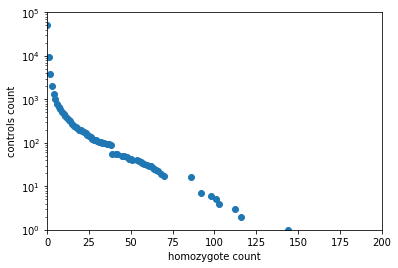

In [23]:

plt.scatter(homs,controls)
plt.axis([0,200,1,100000])
plt.yscale('log')
plt.xlabel("homozygote count")
plt.ylabel("controls count")




Text(0, 0.5, 'pathogenic count')

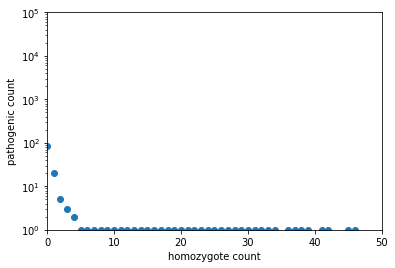

In [24]:

plt.scatter(homs,pats)
plt.axis([0,50,1,100000])
plt.yscale('log')
plt.xlabel("homozygote count")
plt.ylabel("pathogenic count")



Text(0, 0.5, 'benign count')

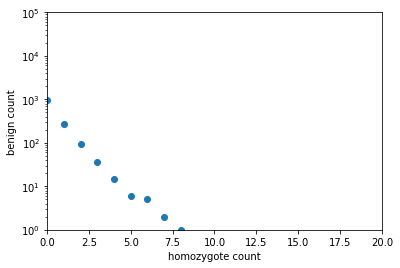

In [25]:

plt.scatter(homs,bens)
plt.axis([0,20,1,100000])
plt.yscale('log')
plt.xlabel("homozygote count")
plt.ylabel("benign count")



In [38]:
rev=['criteria_provided,_multiple_submitters,_no_conflicts']

In [40]:

controls=[]
bens=[]
pats=[]
homs=[]
for i in rare_variants_dbfnsp.gnomAD_exomes_controls_nhomalt.unique():
    
    df=rare_variants_dbfnsp.loc[rare_variants_dbfnsp.gnomAD_exomes_controls_nhomalt>i]
    controls.append(len(df))
    bens.append(sum(df.clinvar_clnsig.isin(['Benign','Likely_benign']) & df.clinvar_review.isin(rev) ))
    pats.append(sum(df.clinvar_clnsig.isin(['Pathogenic','Likely_athogenic'])& df.clinvar_review.isin(rev) ))
    homs.append(i)



Text(0, 0.5, 'controls count')

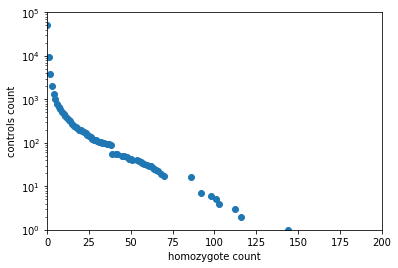

In [41]:

plt.scatter(homs,controls)
plt.axis([0,200,1,100000])
plt.yscale('log')
plt.xlabel("homozygote count")
plt.ylabel("controls count")


Text(0, 0.5, 'pathogenic count')

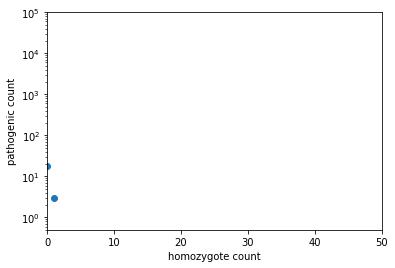

In [45]:

plt.scatter(homs,pats)
plt.axis([0,50,0.5,100000])
plt.yscale('log')
plt.xlabel("homozygote count")
plt.ylabel("pathogenic count")



Text(0, 0.5, 'benign count')

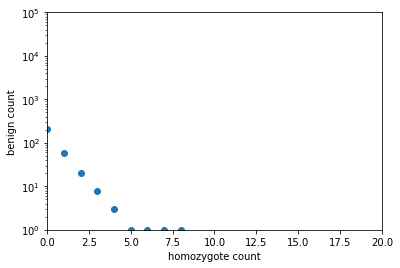

In [43]:

plt.scatter(homs,bens)
plt.axis([0,20,1,100000])
plt.yscale('log')
plt.xlabel("homozygote count")
plt.ylabel("benign count")


In [35]:
rare_variants_dbfnsp.clinvar_review.loc[rare_variants_dbfnsp.clinvar_review.apply(lambda x:x in rev).values]

Series([], Name: clinvar_review, dtype: object)

In [31]:
rare_variants_dbfnsp.clinvar_review.loc[~rare_variants_dbfnsp.clinvar_review.isna()]

2875                     criteria_provided,_single_submitter
2920                          no_assertion_criteria_provided
2929                     criteria_provided,_single_submitter
2948                     criteria_provided,_single_submitter
2951                     criteria_provided,_single_submitter
2953                     criteria_provided,_single_submitter
2970                          no_assertion_criteria_provided
2995                     criteria_provided,_single_submitter
3001                     criteria_provided,_single_submitter
3041                     criteria_provided,_single_submitter
3126                     criteria_provided,_single_submitter
3203                     criteria_provided,_single_submitter
3240                     criteria_provided,_single_submitter
3276                     criteria_provided,_single_submitter
3283                     criteria_provided,_single_submitter
3285                     criteria_provided,_single_submitter
3290                    

In [36]:
rare_variants_dbfnsp.clinvar_review.loc[~rare_variants_dbfnsp.clinvar_review.isna()].iloc[0]

'criteria_provided,_single_submitter'

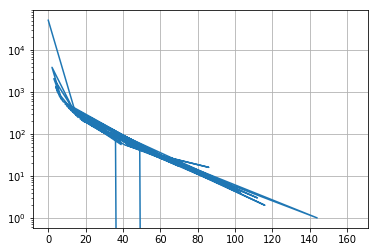

In [11]:
fig,ax=plt.subplots()

ax.semilogy(homs,controls)
ax.grid()

plt.show()

In [ ]:
##fileformat=VCFv4.1
##fileDate=2019-01-23
##source=ClinVar
##reference=GRCh37
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO

In [14]:
reader = pd.read_csv("/home/felipe/dbNSFP4.0b2a.txt.gz",usecols=["hg19_chr","hg19_pos(1-based)",'rs_dbSNP151','ref',"alt"],sep='\t',dtype=str ,chunksize=100000,low_memory=False, )
#na_values = '.'
for i,chunk in enumerate(reader):
    kapeluz={'X':'23','Y':'24','MT':'25'}
    chunkf=chunk.copy()
    chunkf["hg19_chr"]=chunkf["hg19_chr"].map(kapeluz).fillna(chunk["hg19_chr"])
    chunkf=chunk.assign(ex1=".",ex2=".",ex3=".")
    chunkf.to_csv('/home/felipe/dbfsnp_all.vcf',index=False,header=False,columns=["hg19_chr","hg19_pos(1-based)",'rs_dbSNP151','ref',"alt",'ex1','ex2','ex3'],sep='\t')
    
    break
    

In [15]:
chunkf.loc[2200:2300]

,ref,alt,rs_dbSNP151,hg19_chr,hg19_pos(1-based),ex1,ex2,ex3
2200,G,T,.,1,69974,.,.,.
2201,A,C,.,1,69975,.,.,.
2202,A,T,.,1,69975,.,.,.
2203,A,C,.,1,69976,.,.,.
2204,A,G,.,1,69976,.,.,.
2205,A,T,.,1,69976,.,.,.
2206,A,C,.,1,69977,.,.,.
2207,A,G,.,1,69977,.,.,.
2208,A,T,.,1,69977,.,.,.
2209,A,C,.,1,69978,.,.,.


In [3]:
df_cln_info_pat=pd.read_csv("df_cln_info_pat",low_memory=False)

In [4]:
df_cln_info_pat.head()

,Unnamed: 0,clinvar_id,patho_status,auto_dominant,auto_recessive,x_recessive,x_dominant,patho_rev
0,0,475283,Benign,False,False,False,False,"['criteria_provided', '_single_submitter']"
1,1,542074,Uncertain_significance,False,False,False,False,"['criteria_provided', '_single_submitter']"
2,2,183381,Pathogenic,False,False,False,False,['no_assertion_criteria_provided']
3,3,542075,Uncertain_significance,False,False,False,False,"['criteria_provided', '_single_submitter']"
4,4,475278,Benign,False,False,False,False,"['criteria_provided', '_single_submitter']"


In [6]:
df_cln_info_pat[["auto_dominant","auto_recessive"]].agg(sum,axis=1).sum()

84792